## Filtration method 2 : Affinity Graph

In [21]:
import networkx as nx
import numpy as np
import random
from utils import *

In [43]:
G0 = nx.gnm_random_graph(10,20)
for (u,v) in G0.edges():
    G0.edges[u,v]['time'] = random.randint(0,100)

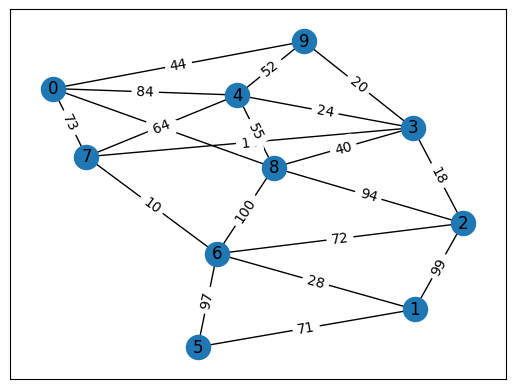

In [44]:
draw_with_labels(G0,'time')

In [47]:

def weighted_affinity(G0):
    vertex_list = range(G0.number_of_nodes())
    vertex_pairs = [(x, y) for x in vertex_list for y in vertex_list if x != y]
    edge_weight_dict = {}

    for pair in vertex_pairs:
        tr_paths = []
        paths = nx.all_simple_edge_paths(G0, source=pair[0], target=pair[1])
        if paths:
            for path in paths:
                time_list = {}
                for edge in path:
                    time_list[edge] = G0.edges[edge]['time']
                if all(list(time_list.values())[i] <= list(time_list.values())[i+1] for i in range(len(time_list) - 1)):
                    tr_paths.append(time_list)
        
        last_times = [list(d.values())[-1] for d in tr_paths]
        if last_times:
            t = min(last_times)
            edge_weight_dict[pair] = t
    
    new_dict = {}
    for key in edge_weight_dict.keys():
        a, b = key
        if (b, a) in edge_weight_dict:
            new_key = (a, b)
            new_value = max(edge_weight_dict[key], edge_weight_dict[(b, a)])
            new_dict[new_key] = new_value

    # Create an empty weighted graph
    G = nx.Graph()

    # Add edges from the dictionary with their weights
    for edge, weight in new_dict.items():
        G.add_edge(edge[0], edge[1], weight=weight)

    return G

In [48]:
G = weighted_affinity(G0)

## Algo for affinity graph

In [2]:
import networkx as nx
import heapq
import random

In [3]:
def time_respecting_paths(graph, start):
    priority_queue = []
    heapq.heappush(priority_queue, ( start, -float('inf'))) 
    shortest_paths = {vertex: float('inf') for vertex in graph.nodes}
    shortest_paths[start] = 0
    visited = set()
    while priority_queue:
        current_vertex, last_time = heapq.heappop(priority_queue)
        if (current_vertex, last_time) in visited:
            continue
        visited.add((current_vertex, last_time))
        for neighbor in graph.neighbors(current_vertex):
            edge_time = graph[current_vertex][neighbor]['time']
            if edge_time >= last_time:
                if edge_time < shortest_paths[neighbor]:
                    shortest_paths[neighbor] = edge_time
                    heapq.heappush(priority_queue, (neighbor, edge_time))
    
    return shortest_paths

In [4]:
def affinity_graph(G):
    n = G.number_of_nodes()
    T = []
    for i in range(n):
        T += [time_respecting_paths(G, i)]
    G_A = nx.complete_graph(n)
    for (u, v) in G.edges():
        G_A[u][v]['weight'] = min(float('inf'), max(T[u][v],T[v][u]))
    return G_A

In [24]:
G = nx.gnm_random_graph(7,10)

for (u,v) in G.edges():
    G.edges[u,v]['time'] = random.randint(0,100)

{(0, 1): Text(0.7247927410532798, -0.42987740369680133, '95'),
 (0, 2): Text(0.6055419336512201, -0.0025831393787977275, '61'),
 (1, 6): Text(0.050462055724884936, -0.41547366422357335, '50'),
 (1, 3): Text(0.18029995853914657, -0.6606934888349917, '6'),
 (2, 3): Text(0.06104915113708685, -0.23339922451698808, '10'),
 (2, 4): Text(-0.049885161677330855, 0.5595080236717157, '92'),
 (2, 6): Text(-0.06878875167717478, 0.011820600094430256, '93'),
 (3, 6): Text(-0.21882346784252812, -0.4028882080851519, '60'),
 (4, 5): Text(-0.6115112068619712, 0.7421108199506563, '65'),
 (5, 6): Text(-0.6304147968618152, 0.1944233963733708, '98')}

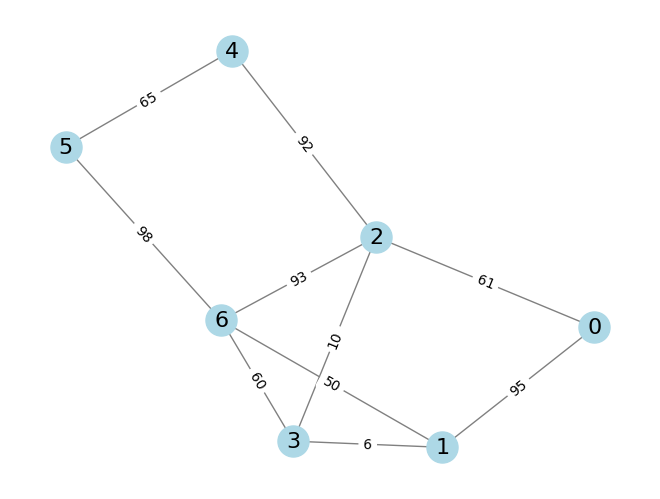

In [25]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
edge_labels = nx.get_edge_attributes(G, 'time')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

In [26]:
A = affinity_graph(G)

In [27]:
weights = nx.get_edge_attributes(A, 'weight')

In [28]:
weights

{(0, 1): 95,
 (0, 2): 61,
 (1, 3): 6,
 (1, 6): 50,
 (2, 3): 10,
 (2, 4): 92,
 (2, 6): 93,
 (3, 6): 60,
 (4, 5): 65,
 (5, 6): 98}

{(0, 1): Text(0.06832704682889523, -0.8448061664715402, '95'),
 (0, 2): Text(-0.3063552604132459, -0.516946893465261, '61'),
 (1, 3): Text(0.6861866272027319, -0.24392399994335603, '6'),
 (1, 6): Text(0.30316239116580385, -0.27006621565309585, '50'),
 (2, 3): Text(0.31150431996059086, 0.08393527306292312, '10'),
 (2, 4): Text(-0.5968088512891288, 0.19996377799141243, '92'),
 (2, 6): Text(-0.07151991607633726, 0.057793057353183276, '93'),
 (3, 6): Text(0.6169757639630719, 0.231959114314842, '60'),
 (4, 5): Text(-0.49680713075255867, 0.6579624441060655, '65'),
 (5, 6): Text(0.028481804460232865, 0.5157917234678364, '98')}

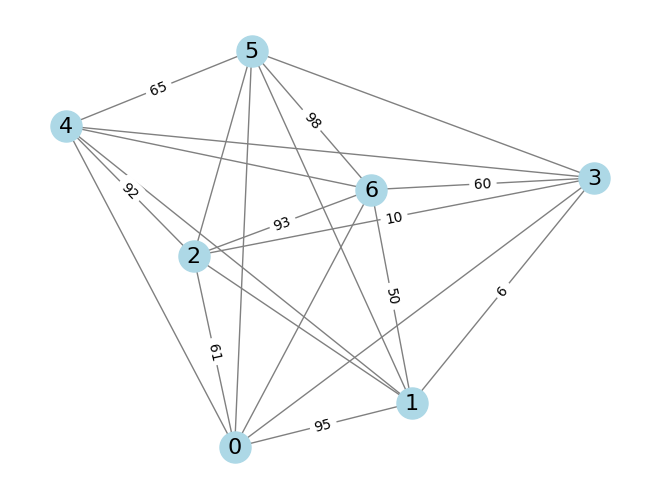

In [29]:
pos = nx.spring_layout(A)
nx.draw(A, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
edge_labels = nx.get_edge_attributes(A, 'weight')
nx.draw_networkx_edge_labels(A, pos, edge_labels=edge_labels)

In [31]:
(nx.adjacency_matrix(G,weight='time')).toarray()

array([[ 0, 95, 61,  0,  0,  0,  0],
       [95,  0,  0,  6,  0,  0, 50],
       [61,  0,  0, 10, 92,  0, 93],
       [ 0,  6, 10,  0,  0,  0, 60],
       [ 0,  0, 92,  0,  0, 65,  0],
       [ 0,  0,  0,  0, 65,  0, 98],
       [ 0, 50, 93, 60,  0, 98,  0]])

In [30]:
(nx.adjacency_matrix(A,weight='weight')).toarray()

array([[ 0, 95, 61,  1,  1,  1,  1],
       [95,  0,  1,  6,  1,  1, 50],
       [61,  1,  0, 10, 92,  1, 93],
       [ 1,  6, 10,  0,  1,  1, 60],
       [ 1,  1, 92,  1,  0, 65,  1],
       [ 1,  1,  1,  1, 65,  0, 98],
       [ 1, 50, 93, 60,  1, 98,  0]])